In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 80
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset2',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset2',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

In [ ]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 224, 224, 3), min=5.000, max=251.000


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_it, test_size=0.2, random_state=42)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6397d3c090> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f635b0c78d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f635b081890> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f6366507610> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f635ab7df10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f635ab9cc50> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f635aba0510> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f635aba54d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f635abad710> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f635abad4d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f635abb0a50> False
<tensorflow.python.keras.layers.c

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                512010    
Total params: 22,314,794
Trainable params: 512,010
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_it.samples

320

In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              metrics=['acc'])

In [ ]:
nb_epochs = 35
batch_size = 80
history = model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
4/4 [==============================] - 302s 67s/step - loss: 3.0210 - acc: 0.1854 - val_loss: 1.2606 - val_acc: 0.5750
Epoch 2/35
4/4 [==============================] - 87s 23s/step - loss: 0.9801 - acc: 0.6858 - val_loss: 0.4968 - val_acc: 0.9000
Epoch 3/35
4/4 [==============================] - 87s 23s/step - loss: 0.3362 - acc: 0.9575 - val_loss: 0.2724 - val_acc: 0.9875
Epoch 4/35
4/4 [==============================] - 87s 23s/step - loss: 0.1807 - acc: 0.9825 - val_loss: 0.2197 - val_acc: 0.9875
Epoch 5/35
4/4 [==============================] - 88s 23s/step - loss: 0.1367 - acc: 0.9908 - val_loss: 0.1933 - val_acc: 0.9875
Epoch 6/35
4/4 [==============================] - 88s 23s/step - loss: 0.1138 - acc: 1.0000 - val_loss: 0.1662 - val_acc: 0.9875
Epoch 7/35
4/4 [==============================] - 88s 23s/step - loss: 0.0863 - acc: 1.0000 - val_loss: 0.1541 - val_acc: 0.9875
Epoch 8/35
4/4 [==============================] - 89s 24s/step - loss: 0.0747 - acc: 1.0000 - va

In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

TypeError: ignored

In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

Text(0.5, 1.0, 'Loss Curves')

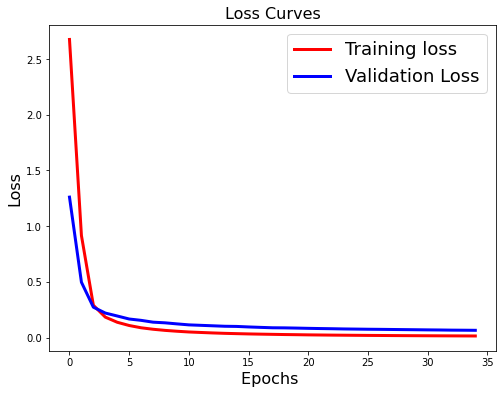

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

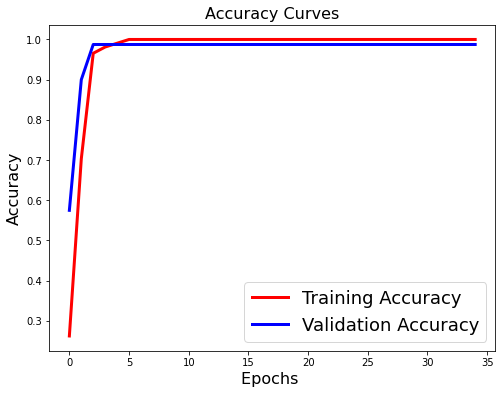

In [ ]:
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['acc'],'r',linewidth=3.0)

plt.plot(history.history['val_acc'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['aa', 'bho', 'bishorgo', 'ga', 'la', 'po', 'rri', 'ta', 'th', 'tho']


In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.9875


In [ ]:
cm = confusion_matrix(y_true,y_pred)

Normalized confusion matrix


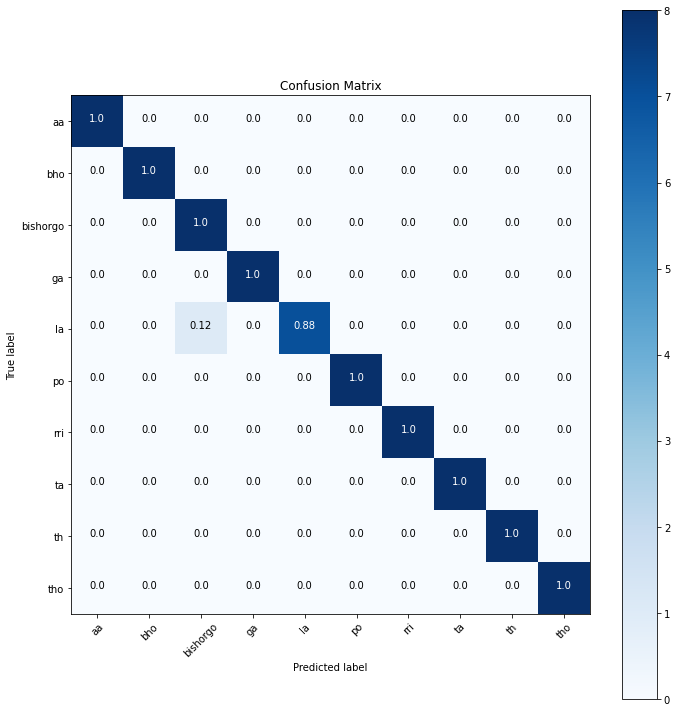

In [ ]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

          aa       1.00      1.00      1.00         8
         bho       1.00      1.00      1.00         8
    bishorgo       0.89      1.00      0.94         8
          ga       1.00      1.00      1.00         8
          la       1.00      0.88      0.93         8
          po       1.00      1.00      1.00         8
         rri       1.00      1.00      1.00         8
          ta       1.00      1.00      1.00         8
          th       1.00      1.00      1.00         8
         tho       1.00      1.00      1.00         8

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_2_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_2_inception/assets
